# Lecture 5 
## Julia Programming (part 4)
## Date: 9.11

## Functions
Functions does not deserve any particular definition. 

In Julia there are **two** types of function definitions: the **full** and the abbreviated one. 

The full reads as follows:

In [1]:
function f(x,y)
  return 3x + y
end

f (generic function with 1 method)

and the abbreviated one:

In [2]:
f(x,y) = 3x+y

f (generic function with 1 method)

To use a custom made function you simply need to pass the right inputs:

In [3]:
f(1,3)

6

In [4]:
3 * ( f(3,2) + f(5,6) )

96

Functions ca be **more complex** than simple mathematical expressions, check the following snippet:

In [5]:
function my_func(n, m)
  a = zeros(n,1)
  b = ones(m,1)
  return a, b
end;

In [6]:
x, y = my_func(3,2)

([0.0; 0.0; 0.0], [1.0; 1.0])

In [7]:
myfunc(x) = sin(x) + 3;

In [8]:
myfunc(π)

3.0

As we saw in Lecture 2, in case we want to apply an operation such as addition element-wisely we need to use the ```dot```, check the following **wrong** statement:

In [9]:
myfunc([5 10])

DimensionMismatch: DimensionMismatch("matrix is not square: dimensions are (1, 2)")

conversely we can do it element-wisely with the ```dot```operator:

In [10]:
myfunc.([π 0.5π])

1×2 Array{Float64,2}:
 3.0  4.0

Now consider the following snippet of code:

In [11]:
function f(x)
  return x+a
end

function run()
  a = 10
  return f(5)
end

run()

UndefVarError: UndefVarError: a not defined

Such an error is given because ```a``` is defined inside the function but **not globally**, the following snippet is the correct one 

In [12]:
function f(x)
  return x+a
end

function run()
  return f(5)
end

a = 10
run()

15

The primary use of functions is passing them to other functions which taking other functions as arguments. 

A classic example is ```map```, which applies a function to each value of an array and returns a new array containing the resulting values:

In [13]:
map((x) -> x^2, [1, 2, 3, 7])

4-element Array{Int64,1}:
  1
  4
  9
 49

### Exercises 

#### Ex1
Write a function to create and print a list where the values are the number and its square. Do this for $1...30$ (both included).

##### Solution

In [14]:
function f(x)
  return x,x^2
end

map(f, 1:30)

30-element Array{Tuple{Int64,Int64},1}:
 (1, 1)   
 (2, 4)   
 (3, 9)   
 (4, 16)  
 (5, 25)  
 (6, 36)  
 (7, 49)  
 (8, 64)  
 (9, 81)  
 (10, 100)
 (11, 121)
 (12, 144)
 (13, 169)
 ⋮        
 (19, 361)
 (20, 400)
 (21, 441)
 (22, 484)
 (23, 529)
 (24, 576)
 (25, 625)
 (26, 676)
 (27, 729)
 (28, 784)
 (29, 841)
 (30, 900)

#### Ex2
Do the same but with list comprehension.

##### Solution

In [15]:
[(i,i^2) for i in 1:30]

30-element Array{Tuple{Int64,Int64},1}:
 (1, 1)   
 (2, 4)   
 (3, 9)   
 (4, 16)  
 (5, 25)  
 (6, 36)  
 (7, 49)  
 (8, 64)  
 (9, 81)  
 (10, 100)
 (11, 121)
 (12, 144)
 (13, 169)
 ⋮        
 (19, 361)
 (20, 400)
 (21, 441)
 (22, 484)
 (23, 529)
 (24, 576)
 (25, 625)
 (26, 676)
 (27, 729)
 (28, 784)
 (29, 841)
 (30, 900)

## Plotting

Plotting in Julia may seem like a **Far West**, but in fact this abundance of plotting library is a great feature because allows Julia to interact with many **top-quality libraries** from other languages such as **Matplotlib** (Python) or **Plotly** (written in JavaScript but pretty agnostic).

Many of this libraries are carefully wrapped inside the ```Plots``` library, which may be thought as a plotting metapackage bringing many different plotting packages under a single API. 

You can find the full manual [here](http://docs.juliaplots.org/latest/backends/).

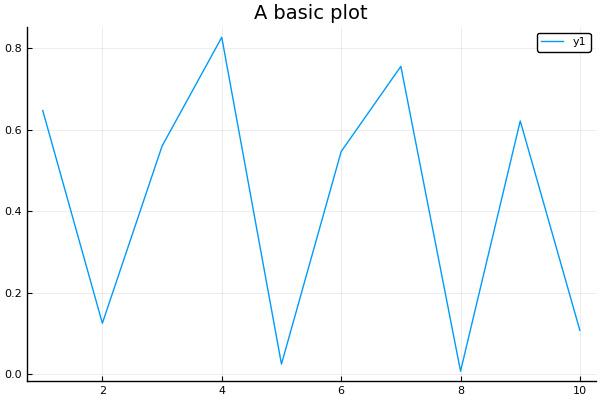

In [16]:
using Plots;
pyplot()

x = 1:10; y = rand(10);
plot(x,y, title = "A basic plot")

You can also plot functions and not just data-points

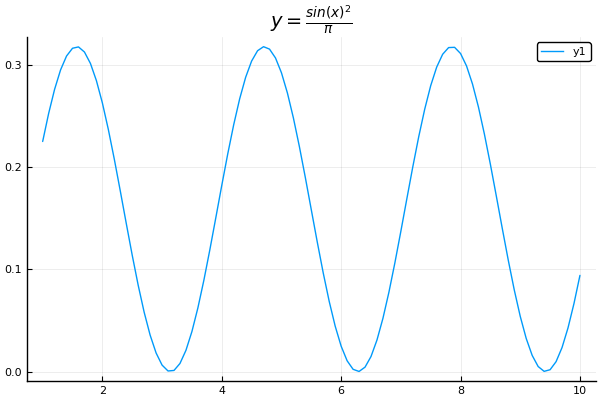

In [17]:
using LaTeXStrings;

myfun(x) = ((sin(x))^2)/π 

plot(myfun, 1:0.1:10, title = L"$ y = \frac{sin(x)^2}{\pi}$")  

### Exercise

#### Ex1
Plot the following step function:
$$
f(x) \begin{cases} x + \frac{\sin(100 x)}{2}, \quad x < -1 \\ -(x+2), \quad -1 \leq x \leq 1 \\ \sqrt(x-1) -3, \quad x > 1
\end{cases}
$$

##### Solution

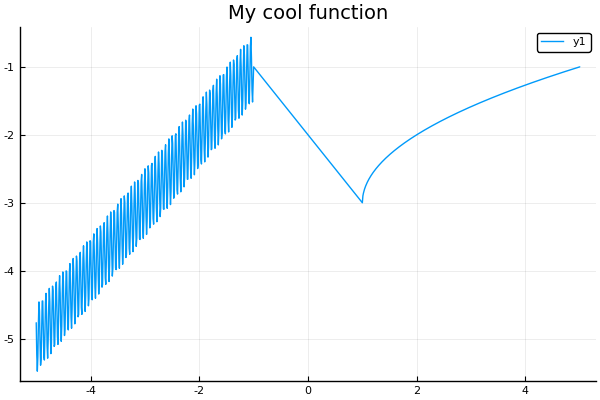

In [18]:
function f(x)
    if x < -1
        return x + sin(100x)/2
    elseif -1 <= x <= 1
        return -x -2
    else 
        return sqrt(x-1)-3
    end
end

plot(f, -5:0.01:5, title = "My cool function")  

#### Ex2
Since this is an Economics Master Course, try to plot a Cobb Douglas utility function for an agent consuming two bundles (chose an $\alpha \in (0,1)$).

#### Solution

In [19]:
u(x,y) = x^(0.2) * y^(1-0.2)

x= [1.0:0.3:10;];
y= [1.0:0.3:10;];

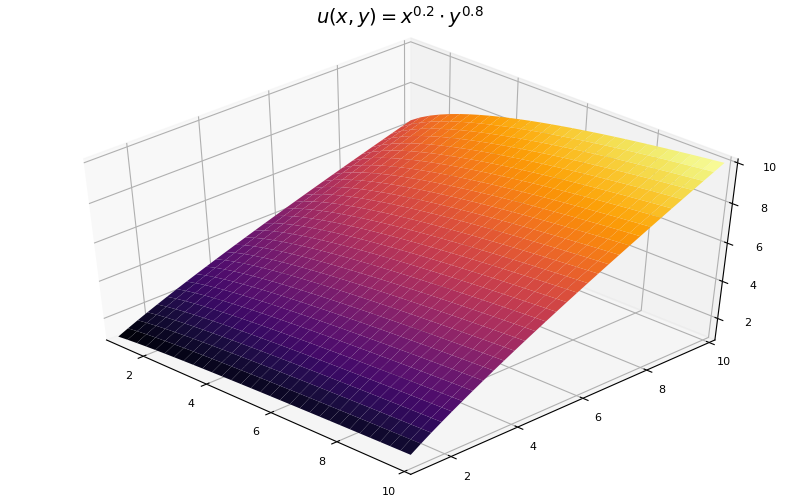

In [20]:
plot(x,y,u,legend=false, st =:surface, size=[800,500],camera=(45, 45), title = L"u(x,y) = x^{0.2} \cdot y^{0.8}")

#### Ex3
Combine loops and plots and create an animation identifying the change in utility elasticity of a standard two-bundle Cobb Douglas utility function. 

##### Solution

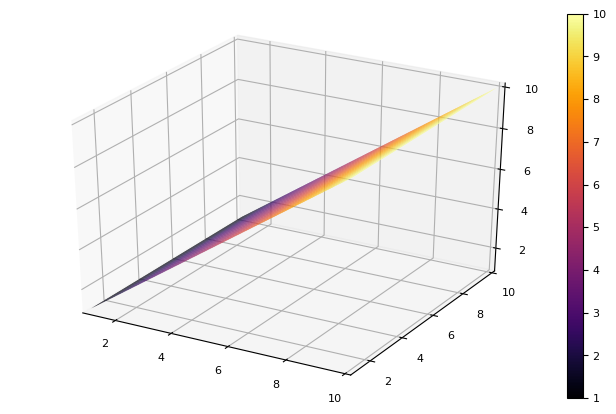

┌ Info: Saved animation to 
│   fn = /home/mrepetto94/mrepetto94@gmail.com/2.Projects/Lezioni/2019-2020/MEF/Tutorial-MMF/tmp.gif
└ @ Plots /home/mrepetto94/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/home/mrepetto94/mrepetto94@gmail.com/2.Projects/Lezioni/2019-2020/MEF/Tutorial-MMF/tmp.gif")

In [21]:
@gif for i in range(0, stop = 1, length = 100)
    α = i;
    
    x= [1.0:0.3:10;];
    y= [1.0:0.3:10;];
    
    k(x,y) = x^(α) * y^(1-α);
    
    plot(x, y, k, st=:surface);

    end

## Accessing files

Reading and writing files is a very important feature and in Julia can be done in a simple way:

In [2]:
datafilename = "data/input.txt"
datafile = open(datafilename)
data = readlines(datafile)
close(datafile)

data

6-element Array{String,1}:
 "Lorem ipsum dolor sit amet,"                                                                                                                            
 "consectetur adipiscing elit, "                                                                                                                          
 "sed do eiusmod tempor incididunt ut labore et dolore magna aliqua."                                                                                     
 "Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. "                                           
 "Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, "
 "sunt in culpa qui officia deserunt mollit anim id est laborum."                                                                                         

```datafile``` contains the link to the file whereas ```data``` contains the information array.

In [23]:
data

6-element Array{String,1}:
 "Lorem ipsum dolor sit amet,"                                                                                                                            
 "consectetur adipiscing elit, "                                                                                                                          
 "sed do eiusmod tempor incididunt ut labore et dolore magna aliqua."                                                                                     
 "Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. "                                           
 "Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, "
 "sunt in culpa qui officia deserunt mollit anim id est laborum."                                                                                         

Most of the times the target files are not merely text files but has a **bit of structure**, such as the **Comma Separated Value** files (.csv), consider the following:

In [24]:
using DelimitedFiles;
csvfilename = "data/data.csv";
csvdata = readdlm(csvfilename, ',', header=true);

```csvdata``` contains both the header and the actual body of the .csv

In [25]:
csvdata[2]

1×3 Array{AbstractString,2}:
 "record"  "firm"  "revenues"

In [26]:
csvdata[1]

9×3 Array{Any,2}:
 1  "alpha"  100
 2  "beta"   100
 3  "gamma"  100
 4  "alpha"  102
 5  "beta"    98
 6  "gamma"  189
 7  "alpha"   99
 8  "beta"    96
 9  "gamma"   50

In case you want to write to a file, for example into a .csv file you can use ```writedlm```

In [27]:
numbers = rand(10,3)

10×3 Array{Float64,2}:
 0.220683    0.903217   0.103349 
 0.420528    0.518992   0.0824501
 0.600519    0.659302   0.989597 
 0.556856    0.21093    0.342315 
 0.767327    0.716633   0.498548 
 0.104979    0.593096   0.185985 
 0.750673    0.281025   0.486621 
 0.194997    0.674797   0.314079 
 0.00278793  0.18846    0.848234 
 0.641274    0.0841179  0.236546 

In [28]:
writedlm("data/write.csv", numbers)

### Accessing Databases 

In [71]:
using LibPQ, DataFrames

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1242


In [48]:
conn = LibPQ.Connection("dbname=gtdmo")

PostgreSQL connection (CONNECTION_OK) with parameters:
  user = mrepetto94
  passfile = /home/mrepetto94/.pgpass
  dbname = gtdmo
  port = 5432
  client_encoding = UTF8
  options = -c DateStyle=ISO,YMD -c IntervalStyle=iso_8601 -c TimeZone=UTC
  application_name = LibPQ.jl
  sslmode = prefer
  sslcompression = 0
  gssencmode = disable
  target_session_attrs = any

In [97]:
result = execute(conn, "SELECT topic,body FROM question;")

PostgreSQL result

In [99]:
data = DataFrame(result)

,topic,body
,String⍰,String⍰
1,Discrete Mathematics,Calculate the limit of the following sequence:\n$$\n\\lim_{n\\to +\\infty} (\\sqrt{n^2 + \\sqrt{n^4 + n^3}}-2n)\n$$
2,Graph Theory,Let $G$ be the simple and unoriented graph represented by the following adjacency matrix\n$$\nP=\\begin{bmatrix}\n0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 \\\\\n1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\\\\n1 & 1 & 0 & 0 & 1 & 0 & 0 & 0 \\\\\n1 & 1 & 0 & 0 & 1 & 0 & 0 & 0 \\\\\n1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\\\\n0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 \\\\\n0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 \n\\end{bmatrix}\n$$\nBy how many components is the graph formed? Are them complete?
3,Optimization,"\nGiven the following problem in conditions of ignorance, in which the \nreported values represent \\textbf{benefits}:\n\\begin{center}\n \\begin{tabular}{c|cccc|}\n \\multicolumn{1}{c}{$u_{a\\omega}$} & $\\omega_{1}$ & $\\omega_{2}$ & $\\omega_{3}$ & \\multicolumn{1}{c}{$\\omega_{4}$} \\\\\n \\cline{2-5}\n $a_{1}$ & 70 & 20 & -100 & 30 \\\\\n $a_{2}$ & 80 & 0 & -20 & -40 \\\\\n $a_{3}$ & -10 & 70 & -10 & -20 \\\\\n \\cline{2-5}\n \\end{tabular}\n\\end{center}\nsolve it with the worst-case criterium. Which of the following sentences is true?\n"
4,Optimization,"\nGiven the profile risk $u\\left( f \\right) = f^{2}/100$, which of the following sentences about the decision-maker is true?\n"
5,Graph Theory,"Consider the Markov chain defined on the state space $S=\\{s_1,s_2,s_3\\}$, having transition matrix $$P=\\begin{bmatrix}0 & 0.2 & 0.8 \\\\0.5 & 0 & 0.5 \\\\0.9 & 0.1 & 0 \\end{bmatrix}$$ Which of the following statements is true?"
6,Graph Theory,"Let $(X_0,X_1,X_2,\\dots )$ be the Markov chain defined on $S=\\{s_1,s_2\\}$, with transition matrix $$P=\\begin{bmatrix}0.2 & 0.8\\\\0.9 & 0.1\\end{bmatrix}$$and initial distribution $\\underline{\\pi}_0=[0.5\\ 0.5]$.What is the distribution $\\underline{\\pi}_1$ of $X_1$, that is of the Markov chain at step 1?"
7,Graph Theory,"Consider the following unoriented graph \\begin{center} \\begin{tikzpicture} \\Vertex[IdAsLabel, color = white]{1}\\Vertex[x=3, IdAsLabel,color = white]{2}\\Vertex[x=3,y=-3,IdAsLabel, color = white]{3}\\Vertex[x=-2,y=-3,IdAsLabel, color = white]{4} \\Edge[bend=-30](1)(2) \\Edge[bend=30](1)(2) \\Edge(2)(3) \\Edge(3)(4) \\Edge[loopposition = -70](4)(4)\\end{tikzpicture} \\end{center} Write the corresponding adjacency matrix"
8,Discrete Mathematics,\nInvestigate the behaviour of the following series of matrices:\\\\\n$$\n\\sum_{n=1}^{+\\infty} \\left[\n \\begin{array}{cc}\n {1\\over 3} & 0 \\\\\n 0 & {1\\over 2} \\\\\n \\end{array}\n\\right]^n\n$$\n
9,Discrete Mathematics,\nDetermine the solution to the following difference equation\n$$\nu_{n+2}- 3 u_{n+1} + 2 u_n = -1\n$$\nwith $u_0=1$ and $u_1=2$.\n
